In [140]:
using RigorousInvariantMeasures

In [141]:
D(ϵ) = PwMap([x -> 1 - 4 * x; x -> (2 + ϵ) * (x - 1 / 4); x -> 1 / 2 + ϵ / 4 - (2 + ϵ) * (x - 1 / 2); x -> 4 * (x - 3 / 4)], [0; 1 / 4; 1 / 2; 3 / 4; 1])

E1 = D(0.1)
E2 = D(0.11)

Piecewise-defined dynamic with 4 branches

In [142]:
B = Ulam(1024)

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025))

In [143]:
#dfly(TotalVariation, L1, E1)

RigorousInvariantMeasures.invariant_measure_strong_norm_bound(B, E1), RigorousInvariantMeasures.invariant_measure_strong_norm_bound(B, E2)

(168.00000000000023, 153.45454545454584)

In [144]:
Q1 = DiscretizedOperator(B, E1)
Q2 = DiscretizedOperator(B, E2)

┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/isaia/Coding/RigorousInvariantMeasures.jl/src/GenericAssembler.jl:145
Computing preimages... 100%|█████████████████████████████| Time: 0:00:01
┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/isaia/Coding/RigorousInvariantMeasures.jl/src/GenericAssembler.jl:145


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([1021, 1022, 1023, 1024, 1017, 1018, 1019, 1020, 1021, 1013  …  1016, 1017, 1018, 1019, 1020, 1020, 1021, 1022, 1023, 1024], [1, 1, 1, 1, 2, 2, 2, 2, 2, 3  …  1023, 1023, 1023, 1023, 1023, 1024, 1024, 1024, 1024, 1024], Interval{Float64}[[0.25, 0.25], [0.25, 0.25], [0.25, 0.25], [0.25, 0.25], [0.25, 0.25], [0.25, 0.25], [0.25, 0.25], [0.25, 0.25], [0, 0], [0.25, 0.25]  …  [0, 0], [0.25, 0.25], [0.25, 0.25], [0.25, 0.25], [0.25, 0.25], [0, 0], [0.25, 0.25], [0.25, 0.25], [0.25, 0.25], [0.25, 0.25]], 1024, 1024))

In [145]:
A = Q1.L - Q2.L
opnormbound(L1, A)

2.000000000000682

In [146]:
w = zeros(length(B))

1024-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [147]:
w[length(B)÷2] = 1

1

In [148]:
using Plots, IntervalArithmetic

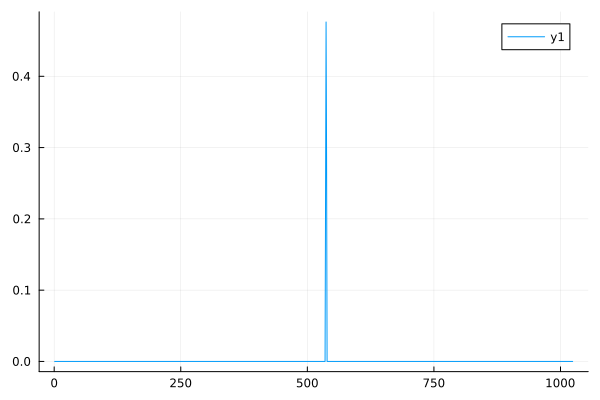

In [149]:
plot(IntervalArithmetic.mid.(Q1.L) * w)

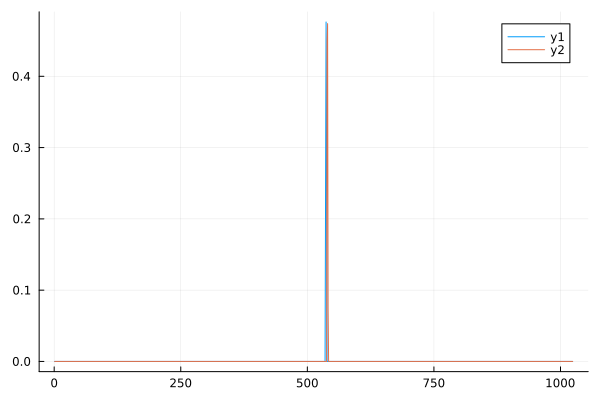

In [150]:
plot!(IntervalArithmetic.mid.(Q2.L) * w)

In [152]:
norms = powernormbounds(B, D; Q=Q2)
w = invariant_vector(B, Q2)
error = distance_from_invariant(B, E2, Q2, w, norms)

7.407995943673991